# Segmentation EDA

In [320]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [321]:
# import data and show 10 entries
data = pd.read_csv("market_segmentation.csv")
data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [322]:
# show size and shape
print(data.size)
print(data.shape)

88748
(8068, 11)


In [323]:
# Show all the data types for all columns
print(data.dtypes)

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object


In [324]:
# Show means and standard deviations
data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


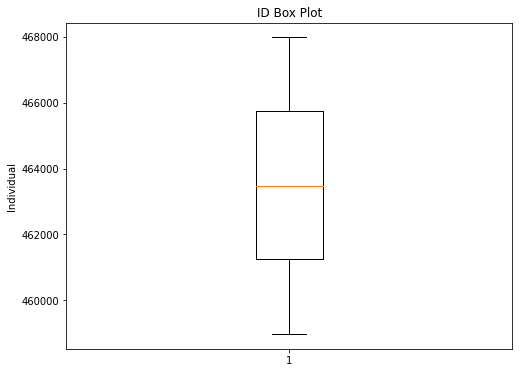

In [325]:
# ID Column in box plot, note: will be cleaned from data.
plt.figure(figsize=(8, 6))
plt.boxplot(data['ID'])
plt.title('ID Box Plot')
plt.ylabel('Individual')
plt.show()

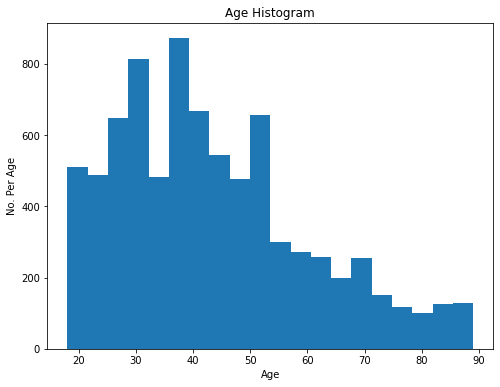

In [326]:
# Age Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Age'],bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('No. Per Age')
plt.show()

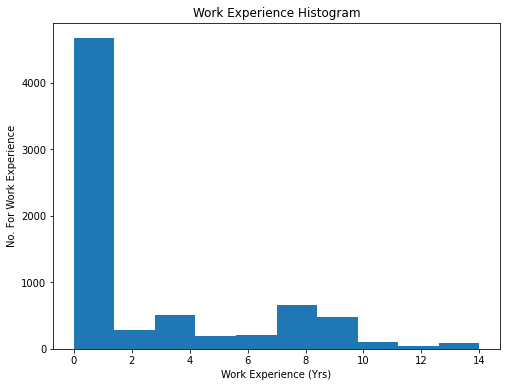

In [327]:
# Work Experience Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Work_Experience'])
plt.title('Work Experience Histogram')
plt.xlabel('Work Experience (Yrs)')
plt.ylabel('No. For Work Experience')
plt.show()

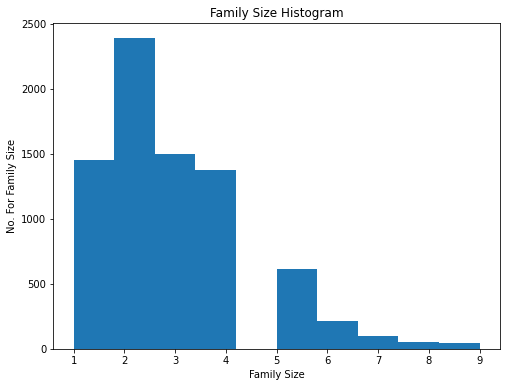

In [328]:
# Family Size Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Family_Size'])
plt.title('Family Size Histogram')
plt.xlabel('Family Size')
plt.ylabel('No. For Family Size')
plt.show()

Converting objects into numerical.

In [329]:
# Show the Value counts for object types
object_columns = data.select_dtypes(include=['object'])

for col in object_columns:
    print("\nColumn Name:", col)
    print(data[col].value_counts())


Column Name: Gender
Male      4417
Female    3651
Name: Gender, dtype: int64

Column Name: Ever_Married
Yes    4643
No     3285
Name: Ever_Married, dtype: int64

Column Name: Graduated
Yes    4968
No     3022
Name: Graduated, dtype: int64

Column Name: Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

Column Name: Spending_Score
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

Column Name: Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

Column Name: Segmentation
D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


In [330]:
from sklearn.preprocessing import LabelEncoder



# Perform mapping for the columns, Gender, Ever_married, 
# Graduated, Profession, Spending Score and Var_1 as they are ordinal
# Label mapping for segmentation
Gender_map = {'Male':0,'Female':1}
yes_no_map = {'No':0,'Yes':1}
Spending_map = {'Low':0,'Average':1,'High':2}
segmentation_map = {'A':0,'B':1,'C':2,'D':3}

# Map for each column
data['Gender'] = data['Gender'].replace(Gender_map)
data['Ever_Married'] = data['Ever_Married'].replace(yes_no_map)
data['Graduated'] = data['Graduated'].replace(yes_no_map)
data['Spending_Score'] = data['Spending_Score'].replace(Spending_map)

# Label encode segmentation
le = LabelEncoder()
data['Segmentation'] = le.fit_transform(data['Segmentation'])


print(data.dtypes)

ID                   int64
Gender               int64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession          object
Work_Experience    float64
Spending_Score       int64
Family_Size        float64
Var_1               object
Segmentation         int32
dtype: object


In [331]:
# One hot encoding needed for Profession and Var 1 
data= pd.get_dummies(data, columns=['Profession','Var_1'])

print(data.dtypes)

ID                            int64
Gender                        int64
Ever_Married                float64
Age                           int64
Graduated                   float64
Work_Experience             float64
Spending_Score                int64
Family_Size                 float64
Segmentation                  int32
Profession_Artist             uint8
Profession_Doctor             uint8
Profession_Engineer           uint8
Profession_Entertainment      uint8
Profession_Executive          uint8
Profession_Healthcare         uint8
Profession_Homemaker          uint8
Profession_Lawyer             uint8
Profession_Marketing          uint8
Var_1_Cat_1                   uint8
Var_1_Cat_2                   uint8
Var_1_Cat_3                   uint8
Var_1_Cat_4                   uint8
Var_1_Cat_5                   uint8
Var_1_Cat_6                   uint8
Var_1_Cat_7                   uint8
dtype: object


## 2. Visualise data

We will visualise the columns that were converted into numerical. Gender, Ever married, Graduated, Spending Score, Var 1 and Profession.

0    4417
1    3651
Name: Gender, dtype: int64


<Figure size 576x432 with 0 Axes>

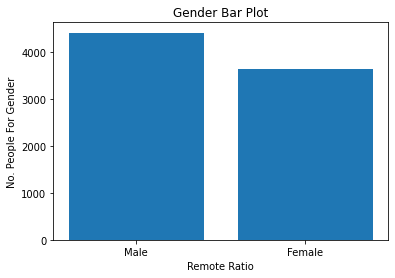

In [332]:
# Plotting Gender into a bar plot.
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
print(data['Gender'].value_counts(ascending=False))
labels = ['Male','Female']
ax.bar(labels,data['Gender'].value_counts(ascending=False))
ax.set_xlabel('Remote Ratio')
ax.set_ylabel('No. People For Gender')
ax.set_title('Gender Bar Plot')
plt.show()

1.0    4643
0.0    3285
Name: Ever_Married, dtype: int64


<Figure size 576x432 with 0 Axes>

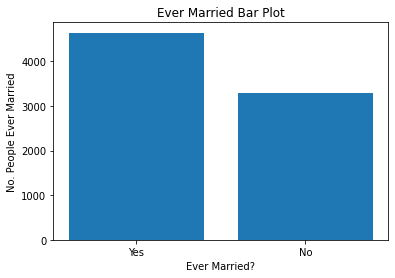

In [333]:
# Plotting Ever Married into a bar plot.
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
print(data['Ever_Married'].value_counts(ascending=False))
labels = ['Yes','No']
ax.bar(labels,data['Ever_Married'].value_counts(ascending=False))
ax.set_xlabel('Ever Married?')
ax.set_ylabel('No. People Ever Married')
ax.set_title('Ever Married Bar Plot')
plt.show()

1.0    4968
0.0    3022
Name: Graduated, dtype: int64


<Figure size 576x432 with 0 Axes>

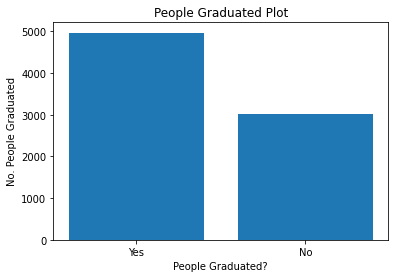

In [334]:
# Plotting Graduated into bar plot.

plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
print(data['Graduated'].value_counts(ascending=False))
labels = ['Yes','No']
ax.bar(labels,data['Graduated'].value_counts(ascending=False))
ax.set_xlabel('People Graduated?')
ax.set_ylabel('No. People Graduated')
ax.set_title('People Graduated Plot')
plt.show()

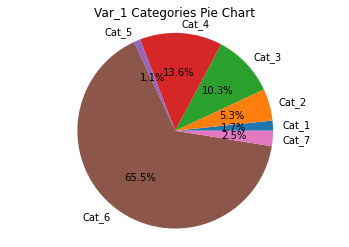

In [335]:
# Plotting Var 1 into Pie Chart.
var_1_categories = ['Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
                    'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']


# sum and label each category
sizes = [data[category].sum() for category in var_1_categories]
labels = ['_'.join(category.split('_')[2:]) for category in var_1_categories]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Var_1 Categories Pie Chart')
plt.show()

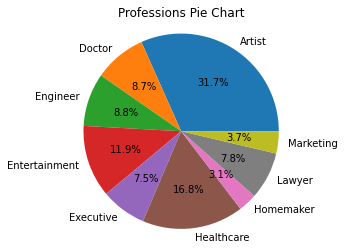

In [336]:
# plotting Profession into Pie plot.

professions = ['Profession_Artist','Profession_Doctor','Profession_Engineer','Profession_Entertainment', 
               'Profession_Executive','Profession_Healthcare','Profession_Homemaker','Profession_Lawyer', 
               'Profession_Marketing']


# sum and label each profession
sizes = [data[profession].sum() for profession in professions]
labels = [profession.split('_')[1] for profession in professions]


plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Professions Pie Chart')
plt.show()

## 3. Clean data

In this section we will be removing the ID Column which is non correlating and removing Rows Containing Nan Values.

In [337]:
# Removing Nan Values
data = data.dropna()

# Removing ID Column
data = data.drop(['ID'], axis=1)

In [338]:
# Check the columns and datatypes, only dependent variable should be object type and ID should be gone.
print(data.dtypes)

Gender                        int64
Ever_Married                float64
Age                           int64
Graduated                   float64
Work_Experience             float64
Spending_Score                int64
Family_Size                 float64
Segmentation                  int32
Profession_Artist             uint8
Profession_Doctor             uint8
Profession_Engineer           uint8
Profession_Entertainment      uint8
Profession_Executive          uint8
Profession_Healthcare         uint8
Profession_Homemaker          uint8
Profession_Lawyer             uint8
Profession_Marketing          uint8
Var_1_Cat_1                   uint8
Var_1_Cat_2                   uint8
Var_1_Cat_3                   uint8
Var_1_Cat_4                   uint8
Var_1_Cat_5                   uint8
Var_1_Cat_6                   uint8
Var_1_Cat_7                   uint8
dtype: object


In [339]:
# Check that null values were removed
print(data.isnull().sum())

Gender                      0
Ever_Married                0
Age                         0
Graduated                   0
Work_Experience             0
Spending_Score              0
Family_Size                 0
Segmentation                0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
Var_1_Cat_1                 0
Var_1_Cat_2                 0
Var_1_Cat_3                 0
Var_1_Cat_4                 0
Var_1_Cat_5                 0
Var_1_Cat_6                 0
Var_1_Cat_7                 0
dtype: int64


In [340]:
# Standardizing the age column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Age'] = scaler.fit_transform(data['Age'].values.reshape(-1, 1))

In [341]:
# Feature selection by dropping values with less than 0.05 Correlation
select_matrix = data.corr()
correlation_with_target = select_matrix['Segmentation'].sort_values(ascending=False)

low_corr_features = correlation_with_target[abs(correlation_with_target) < 0.05].index
data.drop(low_corr_features, axis=1, inplace=True)

## 4. Identify correlated variables

                          Ever_Married       Age  Graduated  Spending_Score  \
Ever_Married                  1.000000  0.568312   0.204051        0.616483   
Age                           0.568312  1.000000   0.247284        0.430411   
Graduated                     0.204051  0.247284   1.000000        0.116575   
Spending_Score                0.616483  0.430411   0.116575        1.000000   
Family_Size                  -0.085502 -0.283378  -0.236620        0.095453   
Segmentation                 -0.208597 -0.232587  -0.174693       -0.102058   
Profession_Artist             0.176771  0.120313   0.366321        0.044339   
Profession_Engineer           0.015249 -0.035055  -0.111085       -0.028615   
Profession_Entertainment      0.016414 -0.015392  -0.000474       -0.064887   
Profession_Healthcare        -0.420174 -0.438670  -0.248500       -0.265852   
Profession_Lawyer             0.199298  0.538349   0.007709        0.212892   
Profession_Marketing         -0.098395 -0.075055  -0

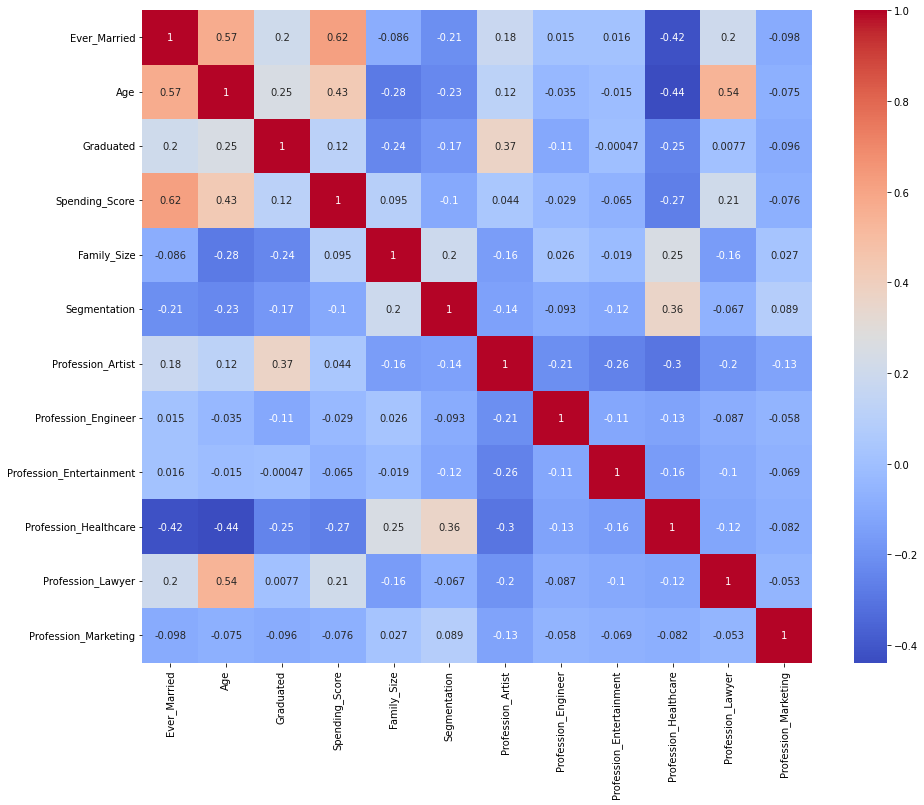

In [342]:
# Create final correlation matrix and plot as heatmap.
corr_matrix = data.corr()
print(corr_matrix)

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Some strong correlations from this matrix, Spending_Score and Being married Being a lawyer and being Older, Lastly Being Married and being Older

## 5. Summary

In step 1, We plotted ID, Age, Work_Experience and Family Size. Of these I would pick ID to later remove as it had little to no relation.

In transforming the non-numerical types, Gender and yes/no were mapped into 0 or 1 as they only had two different types, The dependent variable segmentation was mapped into label encoding, Spending was ordinally mapped. Lastly Profession and Var_1 was one-hot encoded as it would not add too many new columns.

In step 2, We visualized the transformed non-numerical types. Finding Majorities for the dataset being Male, Married, Graduates, Category 6 and Artists.

In Step 3 the data set was cleaned by removing the ID column, which was simply an unique identifier not needed for the data.
Any columns containing a Nan value were also removed as it could potentially impact the model that would be trained on it.
Next we standardized the age column in order to improve the feature scaling it could potentially impact.
And lastly features with less than 0.05 correlation with segmentation were removed from the data set, helping to simplify the data and focus on more impactful columns.

In step 4 We visualized the correlation between the variables and discovered A correlation of spending score with age, being married and being in the executive position. Additionally, Age was correlated with being in the lawyer profession.

Some other interesting correlations included Healthcare professionals (not belonging as doctor) being negatively correlated with age, martial status and spending score.

Next we will move on to performing Logistic regression on this data set

In [343]:
# Export Csv
data.to_csv('market_processed.csv', index=False)